In [28]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
img = cv2.imread("data/segmentation-test.pgm", cv2.IMREAD_GRAYSCALE)

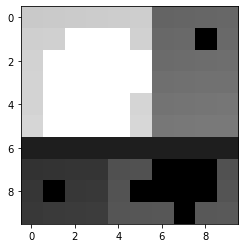

In [29]:
plt.imshow(img,cmap='gray')
plt.show()

In [67]:
def backtrace(parent, start, end):
    path = [end]
    while path[-1] != start:
        path.append(parent[path[-1]])
    path.reverse()
    if path[1][0] == start[0] and path[1][1] == start[1] + 1:
        return 0
    if path[1][0] == start[0] - 1 and path[1][1] == start[1] + 1:
        return 1
    if path[1][0] == start[0] - 1 and path[1][1] == start[1]:
        return 2
    if path[1][0] == start[0] - 1 and path[1][1] == start[1] - 1:
        return 3
    if path[1][0] == start[0] and path[1][1] == start[1] - 1:
        return 4
    if path[1][0] == start[0] + 1 and path[1][1] == start[1] - 1:
        return 5
    if path[1][0] == start[0] + 1 and path[1][1] == start[1]:
        return 6
    if path[1][0] == start[0] + 1 and path[1][1] == start[1] + 1:
        return 7
    return -1


def bfs(img, start):
    visited = np.zeros(img.shape, np.uint8)
    parent = {}
    queue = []
    queue.append(start)
    while queue:
        node = queue.pop(0)
        if visited[node[0], node[1]] == 0:
            visited[node[0], node[1]] = 1
            if img[node[0],node[1]] < img[start[0],start[1]]:
                return backtrace(parent, start, node)
            for i in range(-1,2):
                for j in range(-1,2):
                    if (not (i == 0 and j == 0)) and visited[node[0]+i,node[1]+j] == 0 and img[node[0]+i,node[1]+j] == img[start[0],start[1]]:
                        parent[(i,j)] = node
                        queue.append((i,j))

def neighbours(image, pixel):
    l = []
    is_top_border = False if pixel[0]-1 >= 0 else True
    is_bot_border = False if pixel[0]+1 < image.shape[0] else True
    is_left_border = False if pixel[1]-1 >= 0 else True
    is_right_border = False if pixel[1]+1 < image.shape[1] else True
    
    if (not is_top_border) and (not is_left_border):
        l.append(image[pixel[0]-1,pixel[1]-1])
    if (not is_top_border):
        l.append(image[pixel[0]-1,pixel[1]])
    if (not is_top_border) and (not is_right_border):
        l.append(image[pixel[0]-1,pixel[1]+1])
    if (not is_left_border):
        l.append(image[pixel[0],pixel[1]-1])
    if (not is_right_border):
        l.append(image[pixel[0],pixel[1]+1])
    if (not is_bot_border) and (not is_left_border):
        l.append(image[pixel[0]+1,pixel[1]-1])
    if (not is_bot_border):
        l.append(image[pixel[0]+1,pixel[1]])
    if (not is_bot_border) and (not is_right_border):
        l.append(image[pixel[0]+1,pixel[1]+1])
    return l
                
def getMinDirection(image, pixel):
    is_top_border = False if pixel[0]-1 > 0 else True
    is_bot_border = False if pixel[0]+1 < image.shape[0] else True
    is_left_border = False if pixel[1]-1 > 0 else True
    is_right_border = False if pixel[1]+1 < image.shape[1] else True
    
    if (not is_right_border) and image[pixel[0],pixel[1]+1] == min(neighbours(image, pixel)):
        return 0
    if (not is_top_border) and (not is_right_border) and image[pixel[0]-1,pixel[1]+1] == min(neighbours(image, pixel)):
        return 1
    if (not is_top_border) and image[pixel[0]-1,pixel[1]] == min(neighbours(image, pixel)):
        return 2
    if (not is_left_border) and image[pixel[0]-1,pixel[1]-1] == min(neighbours(image, pixel)):
        return 3
    if image[pixel[0],pixel[1]-1] == min(neighbours(image, pixel)):
        return 4
    if (not is_bot_border) and (not is_left_border) and image[pixel[0]+1,pixel[1]-1] == min(neighbours(image, pixel)):
        return 5
    if (not is_bot_border) and image[pixel[0]+1,pixel[1]] == min(neighbours(image, pixel)):
        return 6
    if (not is_bot_border) and (not is_right_border) and image[pixel[0]+1,pixel[1]+1] == min(neighbours(image, pixel)):
        return 7
    return -1

In [69]:
pointers = np.zeros(img.shape, np.uint8)
labels = {}

for i in range(img.shape[0]):
    for j in range(img.shape[1]):
        if img[i,j] == max(neighbours(img, (i,j))) and img[i,j] == min(neighbours(img, (i,j))):
            # pixel is plateau
            pointers[i,j] = bfs(img, (i,j))
            labels[(i,j)] = "plateau"
        elif img[i,j] <= min(neighbours(img, (i,j))):
            # pixel is local minimum
            pointers[i,j] = -1
            labels[(i,j)] = "minimum"
        else:
            # pixel is normal
            pointers[i,j] = getMinDirection(img, (i,j))
            labels[(i,j)] = "normal"
            

In [110]:
pointers_str = np.char.mod('%d', pointers)

In [111]:
for i in range(0,len(pointers_str)):
    for j in range(0,len(pointers_str[0])):
        if (pointers[i,j] == 255):
            pointers_str[i,j] = '·'
        if (pointers[i,j] == 0):
            pointers_str[i,j] = '→'
        if (pointers[i,j] == 1):
            pointers_str[i,j] = '↗'
        if (pointers[i,j] == 2):
            pointers_str[i,j] = '↑'
        if (pointers[i,j] == 3):
            pointers_str[i,j] = '↖'
        if (pointers[i,j] == 4):
            pointers_str[i,j] = '←'
        if (pointers[i,j] == 5):
            pointers_str[i,j] = '↙'
        if (pointers[i,j] == 6):
            pointers_str[i,j] = '↓'
        if (pointers[i,j] == 7):
            pointers_str[i,j] = '↘'

· ← ← ← ← → · ↘ ↖ ↙
· · ↖ ↖ ↖ · · → · ←
↑ · ↖ · ↗ ↗ ↑ ↗ ↑ ↖
↑ · · · ↘ ↗ ↑ ↖ ↖ ↖
↑ · · · → ↗ ↑ ↖ ↖ ↖
↓ ↓ ↙ ↙ ↙ ↙ ↙ ↙ ↙ ↙
· · · · · ↘ ↓ ↙ ↙ ↙
↘ ↓ ↙ ↗ ↘ → · · · ←
→ · ← ↖ → · · · · ↖
↗ ↑ ↖ ↖ ↗ ↗ → · ↑ ↖


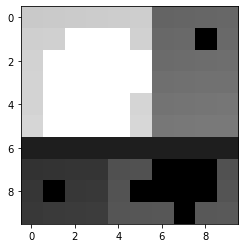

In [114]:
for line in pointers_str:
    print(*line)
plt.imshow(img,cmap='gray')
plt.show()